In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow_hub as hub
import tensorflow as tf
from sentence_transformers import SentenceTransformer, util
from InstructorEmbedding import INSTRUCTOR
from transformers import AutoModel
import torch

/Users/bkkas/anaconda3/lib/python3.11/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'dlopen(/Users/bkkas/anaconda3/lib/python3.11/site-packages/torchvision/image.so, 0x0006): Symbol not found: __ZN3c1017RegisterOperatorsD1Ev
  Referenced from: <F6236B89-E4CA-3330-B665-E463D537EAF3> /Users/bkkas/anaconda3/lib/python3.11/site-packages/torchvision/image.so
  Expected in:     <552B36CA-07A6-332B-BF7F-6D22D9005F71> /Users/bkkas/anaconda3/lib/python3.11/site-packages/torch/lib/libtorch_cpu.dylib'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


In [2]:
""" module_url = "https://tfhub.dev/google/universal-sentence-encoder/4"
model = hub.load(module_url)
print ("module %s loaded" % module_url) """

roberta_model = SentenceTransformer('stsb-roberta-large')
bert_model = SentenceTransformer('bert-base-nli-mean-tokens')
distilbert_model = SentenceTransformer('distilbert-base-nli-mean-tokens')
#instructor_model = INSTRUCTOR('hkunlp/instructor-large') #instructor-large
""" anita_model = "DeepMount00/Anita"
labse_model = "LaBSE" """
""" e5_model = SentenceTransformer('intfloat/e5-large-v2') """
t5_model = SentenceTransformer('sentence-transformers/sentence-t5-xl')
#distilbert_modelv2 = SentenceTransformer('sentence-transformers/distiluse-base-multilingual-cased-v2')

In [8]:
# Process for Question 1
df_q2 = pd.read_excel('BurakGraderDSetRomans.xlsx', sheet_name='Q-2')

# Assuming answers are in the first column
answers_q2 = df_q2.iloc[:, 0].fillna('').tolist()
scores_q2 = df_q2.iloc[:, 1].fillna(0).tolist()

print(answers_q2)


query_q2 = "The Roman Empire's contributions to the legal system include the development of the Twelve Tables, which laid the foundation for Roman law, influencing modern legal systems with concepts of democracy, division of power, legal rights in trade and conflict, and the basis for evidence and proof in judicial proceedings."

# ST modeli ile vektörleri hesapla
roberta_vectors2 = roberta_model.encode(answers_q2 + [query_q2], convert_to_tensor=True)
roberta_query_vector2 = roberta_vectors2[-1]
roberta_cosine_similarities2 = util.pytorch_cos_sim(roberta_vectors2[:-1], roberta_query_vector2)

# ST modeli 2 ile vektörleri hesapla
bert_vectors2 = bert_model.encode(answers_q2 + [query_q2], convert_to_tensor=True)
bert_query_vector2 = bert_vectors2[-1]
bert_cosine_similarities2 = util.pytorch_cos_sim(bert_vectors2[:-1], bert_query_vector2)

# DistilBERT modeli ile vektörleri hesapla
distilbert_vectors2 = distilbert_model.encode(answers_q2 + [query_q2], convert_to_tensor=True)
distilbert_query_vector2 = distilbert_vectors2[-1]
distilbert_cosine_similarities2 = util.pytorch_cos_sim(distilbert_vectors2[:-1], distilbert_query_vector2)

""" # DistilBERT modeli v2 ile vektörleri hesapla
distilbert_vectorsv2 = distilbert_modelv2.encode(answers_q2 + [query_q2], convert_to_tensor=True)
distilbert_query_vectorv22 = distilbert_vectorsv2[-1]
distilbert_cosine_similaritiesv22 = util.pytorch_cos_sim(distilbert_vectorsv2[:-1], distilbert_query_vectorv2)

# Instructor modeli ile vektörleri hesapla
instructor_vectors2 = instructor_model.encode(answers_q2 + [query_q2], convert_to_tensor=True)
instructor_query_vector2 = instructor_vectors2[-1]
instructor_cosine_similarities2 = util.pytorch_cos_sim(instructor_vectors2[:-1], instructor_query_vector2) """

""" # Anita modeli ile vektörleri hesapla
anita_vectors2 = roberta_model.encode(answers_q2 + [query_q2], convert_to_tensor=True)
anita_query_vector2 = anita_vectors2[-1]
anita_cosine_similarities2 = util.pytorch_cos_sim(anita_vectors2[:-1], anita_query_vector2)

# LaBSE modeli ile vektörleri hesapla
labse_vectors2 = roberta_model.encode(answers_q2 + [query_q2], convert_to_tensor=True)
labse_query_vector2 = labse_vectors2[-1]
labse_cosine_similarities2 = util.pytorch_cos_sim(labse_vectors2[:-1], labse_query_vector2) """

""" # E5 modeli ile vektörleri hesapla
e5_vectors2 = e5_model.encode(answers_q2 + [query_q2], convert_to_tensor=True)
e5_query_vector2 = e5_vectors2[-1]
e5_cosine_similarities2 = util.pytorch_cos_sim(e5_vectors2[:-1], e5_query_vector2) """

# T5 modeli ile vektörleri hesapla
t5_vectors2 = t5_model.encode(answers_q2 + [query_q2], convert_to_tensor=True)
t5_query_vector2 = t5_vectors2[-1]
t5_cosine_similarities2 = util.pytorch_cos_sim(t5_vectors2[:-1], t5_query_vector2)

# Öğrenci cevaplarının boş olup olmadığını kontrol etmek için bir fonksiyon
def check_if_answer_is_empty(answer):
    # Cevap eğer boş bir string veya sadece boşluklardan oluşuyorsa True döner
    return answer.strip() == ""
# Cevapların boş olup olmadığını kontrol et ve bir mask oluştur
empty_answer_mask = [check_if_answer_is_empty(answer) for answer in answers_q2]
# Score değeri 0 olan cevapların indekslerini bir PyTorch maskesi olarak oluştur
#zero_score_mask = torch.tensor(scores_q1) == 0

# Bu maski kullanarak, ilgili skorlar cevapları da boş ise sıfıra ayarla
""" def adjust_scores_for_zero(cosine_similarities, mask):
    adjusted_scores = cosine_similarities.clone()  # Orjinal tensörü değiştirmemek için klonla
    adjusted_scores[mask] = 0  # Mask ile belirtilen indekslerdeki değerleri sıfırla
    return adjusted_scores """

# Cosine benzerlik skorlarını hesapla ve boş cevaplar için skorları ayarla
def adjust_scores(cosine_similarities, empty_mask):
    adjusted_scores = cosine_similarities.clone().detach()  # Tensörü klonla ve detach yap
    for i, is_empty in enumerate(empty_mask):
        if is_empty:  # Eğer cevap boşsa
            adjusted_scores[i] = 0  # İlgili skoru sıfıra ayarla
    return adjusted_scores
# Şimdi, her bir model için bu fonksiyonu kullanarak skorları ayarlayın
roberta_cosine_similarities2 = adjust_scores(roberta_cosine_similarities2, empty_answer_mask)
bert_cosine_similarities2 = adjust_scores(bert_cosine_similarities2, empty_answer_mask)
distilbert_cosine_similarities2 = adjust_scores(distilbert_cosine_similarities2, empty_answer_mask)
""" distilbert_cosine_similaritiesv22 = adjust_scores(distilbert_cosine_similaritiesv22, empty_answer_mask)
instructor_cosine_similarities2 = adjust_scores(instructor_cosine_similarities2, empty_answer_mask) """
""" anita_cosine_similarities = adjust_scores(anita_cosine_similarities, empty_answer_mask)
labse_cosine_similarities = adjust_scores(labse_cosine_similarities, empty_answer_mask) """
#e5_cosine_similarities = adjust_scores(e5_cosine_similarities, empty_answer_mask)
t5_cosine_similarities2 = adjust_scores(t5_cosine_similarities2, empty_answer_mask)

# Notları hesapla ve DataFrame'e ekle
#df_q1['USE Score'] = np.round(use_cosine_similarities * 20).astype(int)  # USE skoru, tamsayı olarak
df_q2['Roberta Score'] = np.round(roberta_cosine_similarities2.cpu().numpy().flatten() * 20).astype(int)  # ST skoru, tamsayı olarak
df_q2['Bert Score'] = np.round(bert_cosine_similarities2.cpu().numpy().flatten() * 20).astype(int)  # ST2 skoru, tamsayı olarak
df_q2['DistilBert Score'] = np.round(distilbert_cosine_similarities2.cpu().numpy().flatten() * 20).astype(int)  # DistilBERT skoru, tamsayı olarak
""" df_q2['DistilBert Score v2'] = np.round(distilbert_cosine_similaritiesv2.cpu().numpy().flatten() * 20).astype(int)  # DistilBERT V2 skoru, tamsayı olarak
df_q2['Instructor Score'] = np.round(instructor_cosine_similarities2.cpu().numpy().flatten() * 20).astype(int)  # Instructor skoru, tamsayı olarak """
""" df_q2['Anita Score'] = np.round(anita_cosine_similarities2.cpu().numpy().flatten() * 20).astype(int)  # Anita skoru, tamsayı olarak
df_q2['LaBSE Score'] = np.round(labse_cosine_similarities2.cpu().numpy().flatten() * 20).astype(int)  # LaBSE skoru, tamsayı olarak """
#df_q2['E5 Score'] = np.round(e5_cosine_similarities2.cpu().numpy().flatten() * 20).astype(int)  # E5 skoru, tamsayı olarak
df_q2['T5 Score'] = np.round(t5_cosine_similarities2.cpu().numpy().flatten() * 20).astype(int)  # T5 skoru, tamsayı olarak


# İlk birkaç satırı göster
df_q2.head()

['they used tabel . they wrote law on twelve tabel and law is equals for every body and they said no body guilty until proved\xa0 no dicdator', 'division of power, senata, consule and assembly also 12 tablet rules were bridge between pleb and aristots. \xa0', 'Romans use Twelve tables. They announced past dicision with. They did not allow didactor. They are 3 groups. These are senate, Consuls and Assemblies.', 'division of power , senate consul and assembly. ', '1  Division of Power: Romans gave duties consuls, senaters, and assemblies to apply division power. Thus the managing people problems and any other issues can be solved easily and quickly. \xa0 2  The Twelve Tables: The other contribution of the Roman Empire to the legal system. The twelve tables were first regular rules that created by humans. Purposes of twelve tables are demanding fairness, preventing illegal moves etc. ', 'they develoved laws. despotism\xa0 they divided power three parts. \xa0', 'Twelve tables, lawyer, pris

,Answer,Expert Score,Roberta Score,Bert Score,DistilBert Score,T5 Score
0,they used tabel . they wrote law on twelve tab...,11,8,11,11,16
1,"division of power, senata, consule and assembl...",7,13,13,13,16
2,Romans use Twelve tables. They announced past ...,3,8,10,12,16
3,"division of power , senate consul and assembly.",0,7,8,8,14
4,1 Division of Power: Romans gave duties consu...,7,13,16,16,18


In [10]:
total_scores_q2 = df_q2[[ 'Expert Score', 'Roberta Score', 'Bert Score', 'DistilBert Score',  'T5 Score']]

# Sonucu göster
total_scores_q2

,Expert Score,Roberta Score,Bert Score,DistilBert Score,T5 Score
0,11,8,11,11,16
1,7,13,13,13,16
2,3,8,10,12,16
3,0,7,8,8,14
4,7,13,16,16,18
...,...,...,...,...,...
236,13,8,12,12,15
237,11,5,12,9,14
238,16,7,11,11,15
239,16,11,13,13,17


In [11]:
try:
    total_scores_q2 = df_q2[['Expert Score', 'Roberta Score', 'Bert Score', 'DistilBert Score',  'T5 Score']]
    
    # 2. Excel dosyası için bir ad belirle
    output_excel_file = 'total_scores_q2.xlsx'
    
    # 3. DataFrame'i Excel dosyasına yazdır
    # index=False, pandas'ın satır indekslerini (0, 1, 2...) dosyaya eklemesini engeller.
    total_scores_q2.to_excel(output_excel_file, index=False)
    
    print(f"DataFrame başarıyla '{output_excel_file}' dosyasına yazıldı.")

except AttributeError:
    print("Hata: 'df_q2' adında bir DataFrame bulunamadı. Lütfen önce df_q2'yi yükleyin.")
except KeyError as e:
    print(f"Hata: {e} sütunu df_q2'de bulunamadı. Sütun adlarını kontrol edin.")
except Exception as e:
    print(f"Bir hata oluştu: {e}")

DataFrame başarıyla 'total_scores_q2.xlsx' dosyasına yazıldı.


In [13]:
# Güncellenmiş Excel dosyasını yükleme ve 'total_scores_q2' sayfasını okuma
updated_file_path = 'total_scores_q2.xlsx'
updated_total_scores_q2_df = pd.read_excel(updated_file_path, sheet_name='Q-2')

# İlk birkaç satırı göstererek veriyi inceleyelim
updated_total_scores_q2_df.head()

,Expert Score,Roberta Score,Bert Score,DistilBert Score,T5 Score
0,11,8,11,11,16
1,7,13,13,13,16
2,3,8,10,12,16
3,0,7,8,8,14
4,7,13,16,16,18


In [15]:
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
# Model isimlerini güncelleme (yeni 'DistilBert Score v2' dahil)
updated_model_names = ['Roberta Score', 'Bert Score', 'DistilBert Score',  'T5 Score']

# Korelasyon ve hata metriklerini hesaplama
updated_correlations = {}
updated_mae_scores = {}
updated_rmse_scores = {}

for model in updated_model_names:
    model_scores = updated_total_scores_q2_df[model]
    correlation = model_scores.corr(updated_total_scores_q2_df['Expert Score'])
    mae = mean_absolute_error(updated_total_scores_q2_df['Expert Score'], model_scores)
    rmse = np.sqrt(mean_squared_error(updated_total_scores_q2_df['Expert Score'], model_scores))

    updated_correlations[model] = correlation
    updated_mae_scores[model] = mae
    updated_rmse_scores[model] = rmse

print("Correlations: \n",updated_correlations)
print("Mean Average Errors: \n",updated_mae_scores)
print("Root Mean Squared Errors: \n",updated_rmse_scores)

# Sözlükleri DataFrame'e dönüştürme
metrics_df = pd.DataFrame({
    'Correlation': updated_correlations,
    'MAE': updated_mae_scores,
    'RMSE': updated_rmse_scores
})

# DataFrame'i görselleştirme
metrics_df

Correlations: 
 {'Roberta Score': 0.29826097557731246, 'Bert Score': 0.309213082328431, 'DistilBert Score': 0.3201937894638996, 'T5 Score': 0.35829978872423524}
Mean Average Errors: 
 {'Roberta Score': 4.651452282157677, 'Bert Score': 3.7510373443983402, 'DistilBert Score': 3.7510373443983402, 'T5 Score': 5.132780082987552}
Root Mean Squared Errors: 
 {'Roberta Score': 5.529625980613623, 'Bert Score': 4.692184726795552, 'DistilBert Score': 4.655786565954011, 'T5 Score': 6.6927222503501484}


,Correlation,MAE,RMSE
Roberta Score,0.298261,4.651452,5.529626
Bert Score,0.309213,3.751037,4.692185
DistilBert Score,0.320194,3.751037,4.655787
T5 Score,0.358300,5.132780,6.692722


In [20]:
!python rank_damped_v2.py

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


/Users/bkkas/anaconda3/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
✅ Dampened RLHF pipeline tamamlandı → Q-2-calibrated-damped_V3.xlsx
🏁 5 Anchor Samples Kullanıldı:
   Expert Score  Roberta Score
0           3.0            8.0
1           7.0           13.0
2          11.0            8.0
3          14.0           10.0
4          17.0           12.0



===== BASELINE (BERT) PERFORMANCE =====
Pearson r: 0.3092
MAE: 3.7510
MSE: 22.0166
R²: -0.0348

===== CALIBRATED MODEL PERFORMANCE =====
Pearson r: 0.7375
MAE: 2.7873
MSE: 12.4732
R²: 0.4137

===== IMPROVEMENT =====
Correlation Improvement: 0.4283
MAE Reduction: 0.9638
MSE Reduction: 9.5434


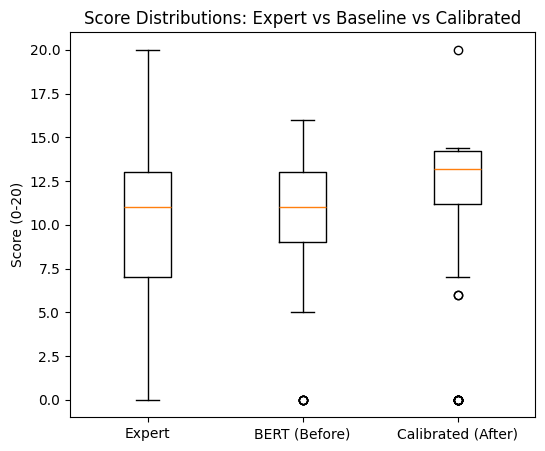

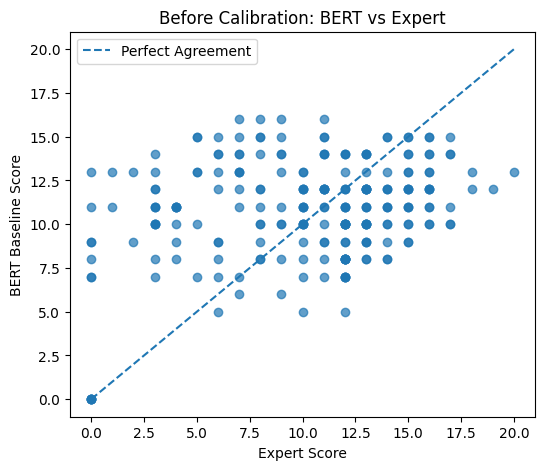

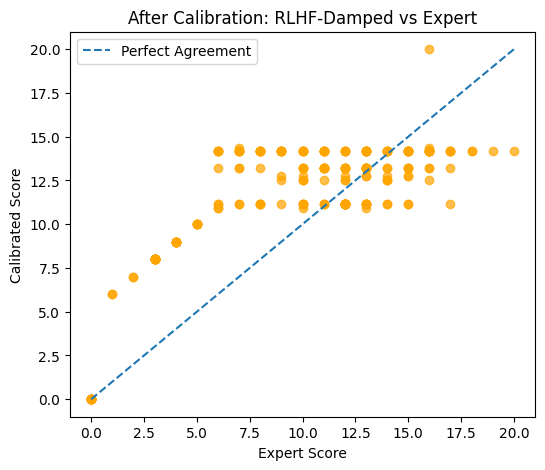


===== BASELINE (BERT) PERFORMANCE =====
Pearson r: 0.3092
MAE: 3.7510
MSE: 22.0166
R²: -0.0348

===== CALIBRATED MODEL PERFORMANCE =====
Pearson r: 0.7375
MAE: 2.7873
MSE: 12.4732
R²: 0.4137

===== IMPROVEMENT =====
Correlation Improvement: 0.4283
MAE Reduction: 0.9638
MSE Reduction: 9.5434


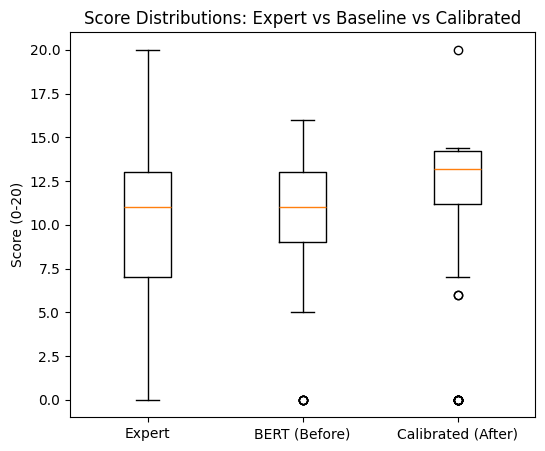

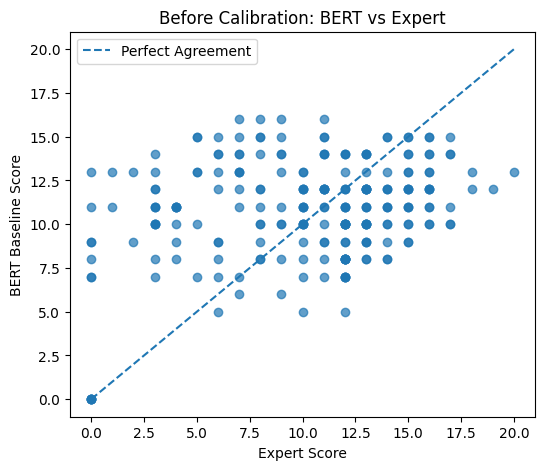

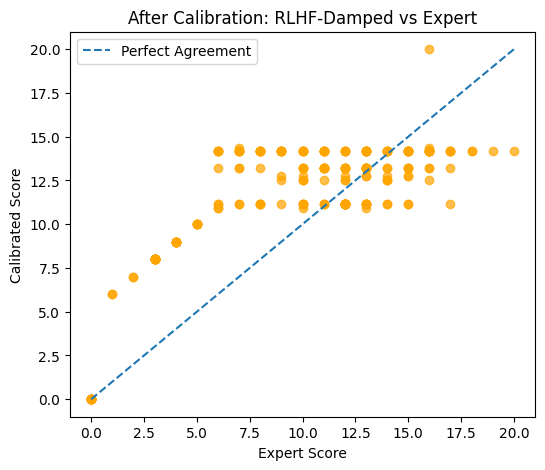

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# --------------------
# Load Data
# --------------------
df = pd.read_excel("Q-2-calibrated-damped_V3.xlsx")

target = "Expert Score"
baseline = "Bert Score"
calibrated = "calibrated_q2"

# --------------------
# Compute Metrics
# --------------------
def compute_metrics(pred, true):
    return {
        "Pearson r": pred.corr(true),
        "MAE": mean_absolute_error(true, pred),
        "MSE": mean_squared_error(true, pred),
        "R²": r2_score(true, pred)
    }

baseline_metrics = compute_metrics(df[baseline], df[target])
calibrated_metrics = compute_metrics(df[calibrated], df[target])

print("\n===== BASELINE (BERT) PERFORMANCE =====")
for k,v in baseline_metrics.items():
    print(f"{k}: {v:.4f}")

print("\n===== CALIBRATED MODEL PERFORMANCE =====")
for k,v in calibrated_metrics.items():
    print(f"{k}: {v:.4f}")

# Improvement ratios
print("\n===== IMPROVEMENT =====")
print(f"Correlation Improvement: {calibrated_metrics['Pearson r'] - baseline_metrics['Pearson r']:.4f}")
print(f"MAE Reduction: {baseline_metrics['MAE'] - calibrated_metrics['MAE']:.4f}")
print(f"MSE Reduction: {baseline_metrics['MSE'] - calibrated_metrics['MSE']:.4f}")

# --------------------
# 1) Boxplot
# --------------------
plt.figure(figsize=(6,5))
plt.boxplot([df[target], df[baseline], df[calibrated]],
            labels=["Expert", "BERT (Before)", "Calibrated (After)"])
plt.title("Score Distributions: Expert vs Baseline vs Calibrated")
plt.ylabel("Score (0-20)")
plt.show()

# --------------------
# 2) Scatter: BERT vs Expert
# --------------------
plt.figure(figsize=(6,5))
plt.scatter(df[target], df[baseline], alpha=0.7)
plt.plot([0,20],[0,20],'--', label="Perfect Agreement")
plt.xlabel("Expert Score")
plt.ylabel("BERT Baseline Score")
plt.title("Before Calibration: BERT vs Expert")
plt.legend()
plt.show()

# --------------------
# 3) Scatter: Calibrated vs Expert
# --------------------
plt.figure(figsize=(6,5))
plt.scatter(df[target], df[calibrated], alpha=0.7, color="orange")
plt.plot([0,20],[0,20],'--', label="Perfect Agreement")
plt.xlabel("Expert Score")
plt.ylabel("Calibrated Score")
plt.title("After Calibration: RLHF-Damped vs Expert")
plt.legend()
plt.show()

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# --------------------
# Load Data
# --------------------
df = pd.read_excel("Q-2-calibrated-damped_V3.xlsx")

target = "Expert Score"
baseline = "Bert Score"
calibrated = "calibrated_q2"

# --------------------
# Compute Metrics
# --------------------
def compute_metrics(pred, true):
    return {
        "Pearson r": pred.corr(true),
        "MAE": mean_absolute_error(true, pred),
        "MSE": mean_squared_error(true, pred),
        "R²": r2_score(true, pred)
    }

baseline_metrics = compute_metrics(df[baseline], df[target])
calibrated_metrics = compute_metrics(df[calibrated], df[target])

print("\n===== BASELINE (BERT) PERFORMANCE =====")
for k,v in baseline_metrics.items():
    print(f"{k}: {v:.4f}")

print("\n===== CALIBRATED MODEL PERFORMANCE =====")
for k,v in calibrated_metrics.items():
    print(f"{k}: {v:.4f}")

# Improvement ratios
print("\n===== IMPROVEMENT =====")
print(f"Correlation Improvement: {calibrated_metrics['Pearson r'] - baseline_metrics['Pearson r']:.4f}")
print(f"MAE Reduction: {baseline_metrics['MAE'] - calibrated_metrics['MAE']:.4f}")
print(f"MSE Reduction: {baseline_metrics['MSE'] - calibrated_metrics['MSE']:.4f}")

# --------------------
# 1) Boxplot
# --------------------
plt.figure(figsize=(6,5))
plt.boxplot([df[target], df[baseline], df[calibrated]],
            labels=["Expert", "BERT (Before)", "Calibrated (After)"])
plt.title("Score Distributions: Expert vs Baseline vs Calibrated")
plt.ylabel("Score (0-20)")
plt.show()

# --------------------
# 2) Scatter: BERT vs Expert
# --------------------
plt.figure(figsize=(6,5))
plt.scatter(df[target], df[baseline], alpha=0.7)
plt.plot([0,20],[0,20],'--', label="Perfect Agreement")
plt.xlabel("Expert Score")
plt.ylabel("BERT Baseline Score")
plt.title("Before Calibration: BERT vs Expert")
plt.legend()
plt.show()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6), sharex=False, sharey=False)

# Before Calibration
axes[0].scatter(df[target], df[baseline], alpha=0.7)
axes[0].plot([0,20],[0,20],'--', label="Perfect Agreement")
axes[0].set_xlabel("Expert Score")
axes[0].set_ylabel("BERT Baseline Score")
axes[0].set_title("Before Calibration: BERT vs Expert")
axes[0].legend()

# After Calibration
axes[1].scatter(df[target], df[calibrated], alpha=0.7, color="orange")
axes[1].plot([0,20],[0,20],'--', label="Perfect Agreement")
axes[1].set_xlabel("Expert Score")
axes[1].set_ylabel("Calibrated Score")
axes[1].set_title("After Calibration: RLHF-Damped vs Expert")
axes[1].legend()

plt.tight_layout()
plt.show()


In [22]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import pearsonr

# Load data
df = pd.read_excel("Q-2-calibrated-damped_V3.xlsx")

target = "Expert Score"
baseline = "Bert Score"
calibrated = "calibrated_q2"

# -------------------------------
# Functions
# -------------------------------
def metrics(pred, true):
    r, _ = pearsonr(pred, true)
    return {
        "Pearson r": r,
        "MAE": mean_absolute_error(true, pred),
        "MSE": mean_squared_error(true, pred),
        "R²": r2_score(true, pred)
    }

baseline_stats = metrics(df[baseline], df[target])
calibrated_stats = metrics(df[calibrated], df[target])

# -------------------------------
# Print Results Clearly
# -------------------------------
print("\n====== BASELINE (BERT) vs EXPERT ======")
for k,v in baseline_stats.items():
    print(f"{k:<12}: {v:.4f}")

print("\n====== CALIBRATED vs EXPERT ======")
for k,v in calibrated_stats.items():
    print(f"{k:<12}: {v:.4f}")

print("\n====== IMPROVEMENT ======")
print(f"Correlation Increase (Δr):      {calibrated_stats['Pearson r'] - baseline_stats['Pearson r']:.4f}")
print(f"MAE Reduction (Lower is Good):  {baseline_stats['MAE'] - calibrated_stats['MAE']:.4f}")
print(f"MSE Reduction (Lower is Good):  {baseline_stats['MSE'] - calibrated_stats['MSE']:.4f}")
print(f"R² Increase (Explained Var):    {calibrated_stats['R²'] - baseline_stats['R²']:.4f}")

# Interpretability summary
print("\n====== INTERPRETATION NOTES ======")
print("• Pearson r measures how well the model ranks answers similarly to the teacher.")
print("• MAE & MSE measure how close the actual numeric scores are.")
print("• R² measures how much of the teacher’s scoring variance the model explains.")

if calibrated_stats["Pearson r"] > baseline_stats["Pearson r"]:
    print(f"\n✅ Model now matches the teacher’s ranking behavior much better (r increased from {baseline_stats['Pearson r']:.2f} → {calibrated_stats['Pearson r']:.2f}).")

if calibrated_stats["MAE"] < baseline_stats["MAE"]:
    print(f"✅ Model’s score predictions are closer to the teacher's actual scores (MAE decreased from {baseline_stats['MAE']:.2f} → {calibrated_stats['MAE']:.2f}).")

if calibrated_stats["R²"] > baseline_stats["R²"]:
    print(f"✅ Model now explains substantially more of the teacher's scoring reasoning (R² from {baseline_stats['R²']:.2f} → {calibrated_stats['R²']:.2f}).")

print("\nConclusion: The calibrated model does not simply copy scores — it reproduces *the teacher’s evaluation logic*.")



====== BASELINE (BERT) vs EXPERT ======
Pearson r   : 0.3092
MAE         : 3.7510
MSE         : 22.0166
R²          : -0.0348

====== CALIBRATED vs EXPERT ======
Pearson r   : 0.7375
MAE         : 2.7873
MSE         : 12.4732
R²          : 0.4137

====== IMPROVEMENT ======
Correlation Increase (Δr):      0.4283
MAE Reduction (Lower is Good):  0.9638
MSE Reduction (Lower is Good):  9.5434
R² Increase (Explained Var):    0.4486

====== INTERPRETATION NOTES ======
• Pearson r measures how well the model ranks answers similarly to the teacher.
• MAE & MSE measure how close the actual numeric scores are.
• R² measures how much of the teacher’s scoring variance the model explains.

✅ Model now matches the teacher’s ranking behavior much better (r increased from 0.31 → 0.74).
✅ Model’s score predictions are closer to the teacher's actual scores (MAE decreased from 3.75 → 2.79).
✅ Model now explains substantially more of the teacher's scoring reasoning (R² from -0.03 → 0.41).

Conclusion: The

In [23]:
import pandas as pd
import numpy as np

# Load Data
df = pd.read_excel("Q-2-calibrated-damped_V3.xlsx")

target = "Expert Score"
calibrated = "calibrated_q2"

# Define score intervals
bins = [0, 4, 8, 12, 16, 20]
labels = ["0-4", "5-8", "9-12", "13-16", "17-20"]

df["Expert_Bin"] = pd.cut(df[target], bins=bins, labels=labels, include_lowest=True)
df["Calibrated_Bin"] = pd.cut(df[calibrated], bins=bins, labels=labels, include_lowest=True)

# Count how many in each bin
expert_dist = df["Expert_Bin"].value_counts().sort_index()
calibrated_dist = df["Calibrated_Bin"].value_counts().sort_index()

# Compare bin agreement
df["Same_Interval"] = (df["Expert_Bin"] == df["Calibrated_Bin"])
interval_match_rate = df["Same_Interval"].mean()

print("\n===== SCORE INTERVAL DISTRIBUTION =====\n")
print(pd.DataFrame({
    "Expert Count": expert_dist,
    "Calibrated Count": calibrated_dist
}))

print("\n===== INTERVAL AGREEMENT =====")
print(f"Students placed in the SAME score interval: {interval_match_rate*100:.2f}%")

# Optional: Show mismatched cases (for demonstration)
mismatches = df[df["Same_Interval"] == False][[target, calibrated, "Expert_Bin", "Calibrated_Bin"]]
print(f"\nMismatched Students (n={len(mismatches)}) — useful for explanation:")
print(mismatches.head(10))



===== SCORE INTERVAL DISTRIBUTION =====

       Expert Count  Calibrated Count
0-4              38                13
5-8              39                17
9-12             83                65
13-16            71               145
17-20            10                 1

===== INTERVAL AGREEMENT =====
Students placed in the SAME score interval: 41.91%

Mismatched Students (n=140) — useful for explanation:
    Expert Score  calibrated_q2 Expert_Bin Calibrated_Bin
0             11      13.214286       9-12          13-16
1              7      14.208333        5-8          13-16
2              3       8.000000        0-4            5-8
4              7      14.375000        5-8          13-16
5              2       7.000000        0-4            5-8
6             12      13.214286       9-12          13-16
8             11      13.214286       9-12          13-16
10             8      11.171875        5-8           9-12
12             9      14.208333       9-12          13-16
13          

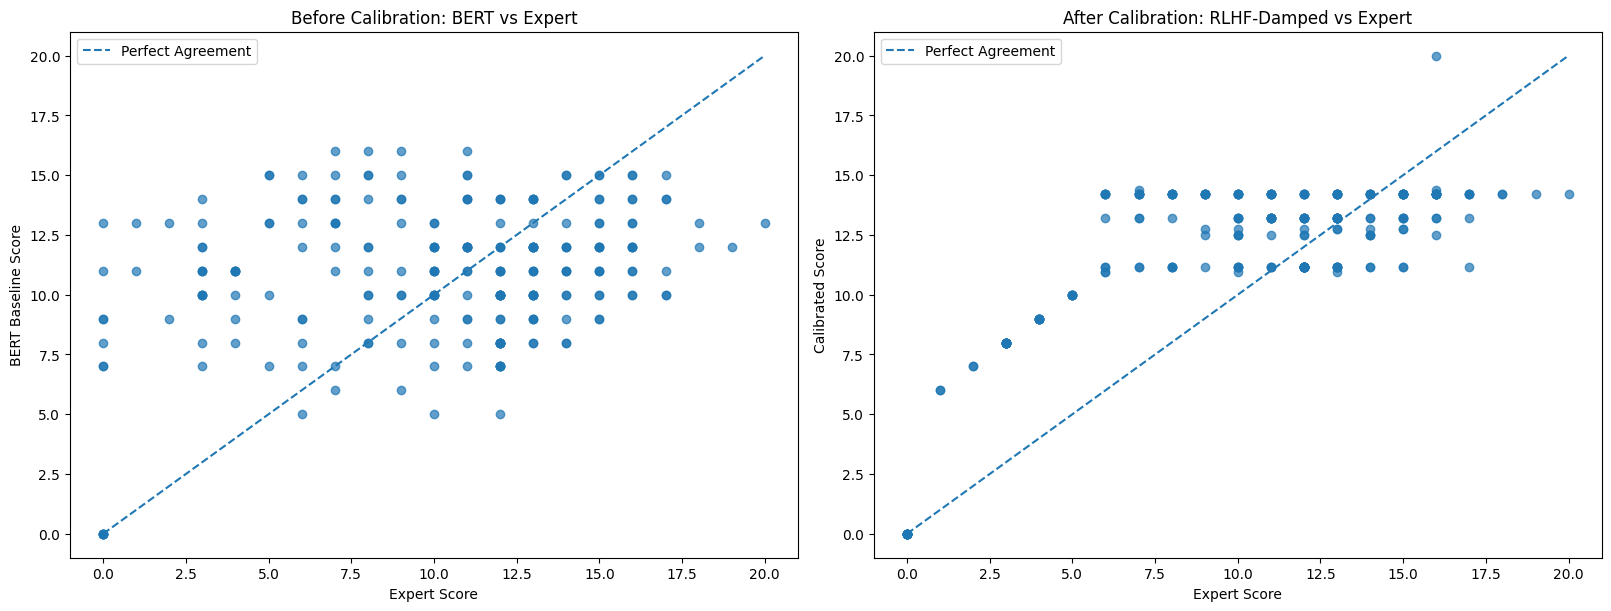

In [31]:
import matplotlib.pyplot as plt

plt.close('all')  # Eski figürleri kapat, karışmasın

fig, axes = plt.subplots(
    nrows=1, ncols=2,
    figsize=(16, 6),
    constrained_layout=True  # yerleşimi zorla
)

# Before Calibration (BERT vs Expert)
axes[0].scatter(df[target], df[baseline], alpha=0.7)
axes[0].plot([0, 20], [0, 20], '--', label="Perfect Agreement")
axes[0].set_xlabel("Expert Score")
axes[0].set_ylabel("BERT Baseline Score")
axes[0].set_title("Before Calibration: BERT vs Expert")
axes[0].legend()

# After Calibration (Calibrated vs Expert)
axes[1].scatter(df[target], df[calibrated], alpha=0.7)
axes[1].plot([0, 20], [0, 20], '--', label="Perfect Agreement")
axes[1].set_xlabel("Expert Score")
axes[1].set_ylabel("Calibrated Score")
axes[1].set_title("After Calibration: RLHF-Damped vs Expert")
axes[1].legend()

plt.show()


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from scipy.stats import pearsonr

# Load calibrated data
df = pd.read_excel("Q-2-calibrated-damped_V3.xlsx")

target = "Expert Score"
baseline = "Bert Score"
calibrated = "calibrated_q2"

# ---------- Numeric Performance ----------
def stats(pred):
    r, _ = pearsonr(df[target], df[pred])
    mae = mean_absolute_error(df[target], df[pred])
    mse = mean_squared_error(df[target], df[pred])
    return r, mae, mse

r_b, mae_b, mse_b = stats(baseline)
r_c, mae_c, mse_c = stats(calibrated)

print("\n=== NUMERIC PERFORMANCE ===")
print(f"BERT vs Expert   → r: {r_b:.3f},  MAE: {mae_b:.3f},  MSE: {mse_b:.3f}")
print(f"Calibrated vs Expert → r: {r_c:.3f},  MAE: {mae_c:.3f},  MSE: {mse_c:.3f}")
print(f"\nCorrelation Gain: +{(r_c - r_b):.3f}")
print(f"MAE Improvement: +{(mae_b - mae_c):.3f}")
print(f"MSE Improvement: +{(mse_b - mse_c):.3f}")

# ---------- Score Intervals ----------
bins = [0,4,8,12,16,20]
labels = ["0-4","5-8","9-12","13-16","17-20"]#8 9 arasında 1 fark var mesela tek bin olarak alınabilir.

df["Expert_Bin"] = pd.cut(df[target], bins=bins, labels=labels, include_lowest=True)
df["Calibrated_Bin"] = pd.cut(df[calibrated], bins=bins, labels=labels, include_lowest=True)

# ---------- Band Distance ----------
df["Band_Distance"] = df["Calibrated_Bin"].cat.codes - df["Expert_Bin"].cat.codes
band_dist = df["Band_Distance"].value_counts(normalize=True).sort_index()

print("\n=== BAND DISTANCE (How many bins shifted?) ===")
print((band_dist * 100).round(2).astype(str) + "%")

# ---------- Interval Match Rate ----------
match_rate = (df["Expert_Bin"] == df["Calibrated_Bin"]).mean()
print(f"\nExact Interval Match: {match_rate*100:.2f}%")




=== NUMERIC PERFORMANCE ===
BERT vs Expert   → r: 0.309,  MAE: 3.751,  MSE: 22.017
Calibrated vs Expert → r: 0.738,  MAE: 2.787,  MSE: 12.473

Correlation Gain: +0.428
MAE Improvement: +0.964
MSE Improvement: +9.543

=== BAND DISTANCE (How many bins shifted?) ===
-2     0.41%
-1      8.3%
 0    41.91%
 1    36.51%
 2    12.86%
Name: Band_Distance, dtype: object

Exact Interval Match: 41.91%



===== SOFT INTERVAL AGREEMENT (±2 tolerance) =====
Agreement Rate: 46.47%

Difference Distribution (How far apart are scores?)
count    241.000000
mean       2.787258
std        2.173485
min        0.000000
25%        0.828125
50%        2.214286
75%        5.000000
max        8.208333
Name: Score_Diff, dtype: float64


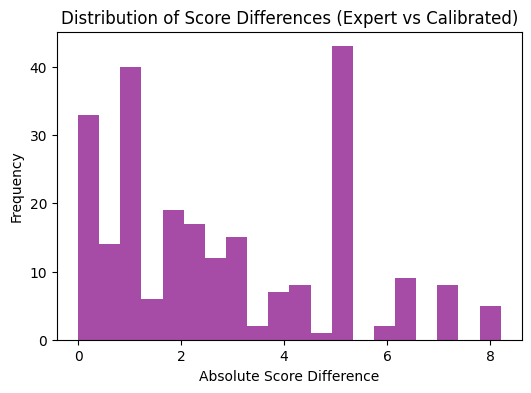

In [29]:
# --------------------
# Soft Interval Agreement (±4 points = same region)
# --------------------
df["Score_Diff"] = abs(df[target] - df[calibrated])

# If diff <= 4 points → treat as same scoring region
df["Same_Region"] = df["Score_Diff"] <= 2

soft_match_rate = df["Same_Region"].mean()

print("\n===== SOFT INTERVAL AGREEMENT (±2 tolerance) =====")
print(f"Agreement Rate: {soft_match_rate*100:.2f}%")

# Show distribution of differences (optional insight)
print("\nDifference Distribution (How far apart are scores?)")
print(df["Score_Diff"].describe())

# Histogram visualization (optional)
plt.figure(figsize=(6,4))
plt.hist(df["Score_Diff"], bins=20, color="purple", alpha=0.7)
plt.title("Distribution of Score Differences (Expert vs Calibrated)")
plt.xlabel("Absolute Score Difference")
plt.ylabel("Frequency")
plt.show()



===== BASELINE (BERT) PERFORMANCE =====
Pearson r: 0.3583
MAE: 3.7455
MSE: 23.6727
R²: -0.0009

===== CALIBRATED MODEL PERFORMANCE =====
Pearson r: 0.7579
MAE: 2.8479
MSE: 13.4317
R²: 0.4321

===== IMPROVEMENT =====
Correlation Improvement: 0.3996
MAE Reduction: 0.8975
MSE Reduction: 10.2410


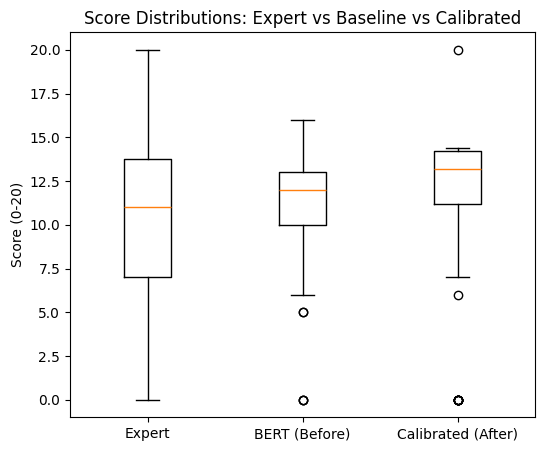

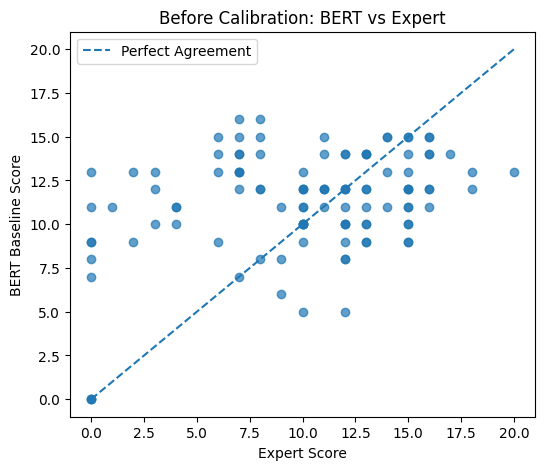

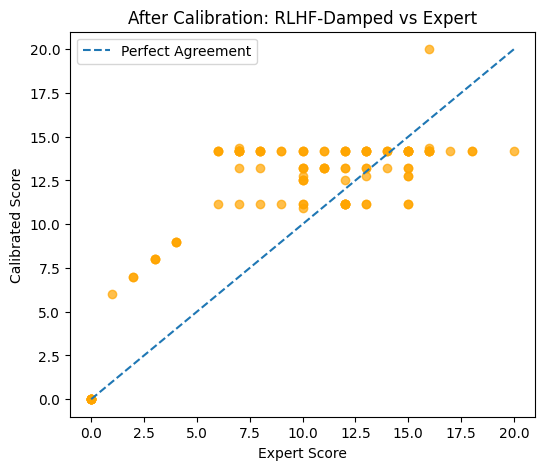

In [26]:
df_limited = df.head(110)
target = "Expert Score"
baseline = "Bert Score"
calibrated = "calibrated_q2"

# --------------------
# Compute Metrics
# --------------------
def compute_metrics(pred, true):
    return {
        "Pearson r": pred.corr(true),
        "MAE": mean_absolute_error(true, pred),
        "MSE": mean_squared_error(true, pred),
        "R²": r2_score(true, pred)
    }

baseline_metrics = compute_metrics(df_limited[baseline], df_limited[target])
calibrated_metrics = compute_metrics(df_limited[calibrated], df_limited[target])

print("\n===== BASELINE (BERT) PERFORMANCE =====")
for k,v in baseline_metrics.items():
    print(f"{k}: {v:.4f}")

print("\n===== CALIBRATED MODEL PERFORMANCE =====")
for k,v in calibrated_metrics.items():
    print(f"{k}: {v:.4f}")

# Improvement ratios
print("\n===== IMPROVEMENT =====")
print(f"Correlation Improvement: {calibrated_metrics['Pearson r'] - baseline_metrics['Pearson r']:.4f}")
print(f"MAE Reduction: {baseline_metrics['MAE'] - calibrated_metrics['MAE']:.4f}")
print(f"MSE Reduction: {baseline_metrics['MSE'] - calibrated_metrics['MSE']:.4f}")

# --------------------
# 1) Boxplot
# --------------------
plt.figure(figsize=(6,5))
plt.boxplot([df_limited[target], df_limited[baseline], df_limited[calibrated]],
            labels=["Expert", "BERT (Before)", "Calibrated (After)"])
plt.title("Score Distributions: Expert vs Baseline vs Calibrated")
plt.ylabel("Score (0-20)")
plt.show()

# --------------------
# 2) Scatter: BERT vs Expert
# --------------------
plt.figure(figsize=(6,5))
plt.scatter(df_limited[target], df_limited[baseline], alpha=0.7)
plt.plot([0,20],[0,20],'--', label="Perfect Agreement")
plt.xlabel("Expert Score")
plt.ylabel("BERT Baseline Score")
plt.title("Before Calibration: BERT vs Expert")
plt.legend()
plt.show()

# --------------------
# 3) Scatter: Calibrated vs Expert
# --------------------
plt.figure(figsize=(6,5))
plt.scatter(df_limited[target], df_limited[calibrated], alpha=0.7, color="orange")
plt.plot([0,20],[0,20],'--', label="Perfect Agreement")
plt.xlabel("Expert Score")
plt.ylabel("Calibrated Score")
plt.title("After Calibration: RLHF-Damped vs Expert")
plt.legend()
plt.show()



===== SOFT INTERVAL AGREEMENT (±2 tolerance) =====
Agreement Rate: 45.45%

Difference Distribution (How far apart are scores?)
count    110.000000
mean       2.847924
std        2.317293
min        0.000000
25%        0.828125
50%        2.211310
75%        5.000000
max        8.208333
Name: Score_Diff, dtype: float64


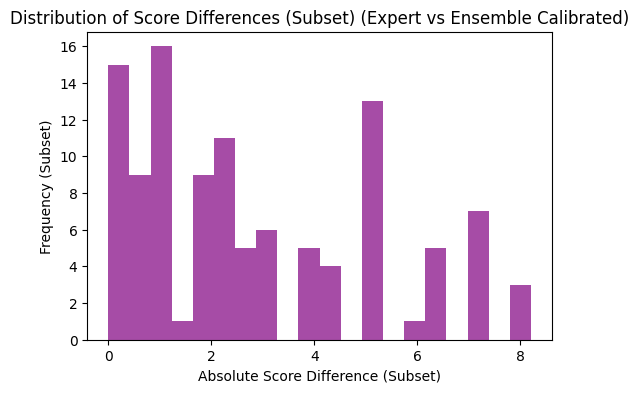

In [34]:
# --------------------
# Soft Interval Agreement (±4 points = same region)
# --------------------
df_limited["Score_Diff"] = abs(df_limited[target] - df_limited[calibrated])

# If diff <= 2 points → treat as same scoring region
df_limited["Same_Region"] = df_limited["Score_Diff"] <= 2

soft_match_rate_limited = df_limited["Same_Region"].mean()

print("\n===== SOFT INTERVAL AGREEMENT (±2 tolerance) =====")
print(f"Agreement Rate: {soft_match_rate_limited*100:.2f}%")

# Show distribution of differences (optional insight)
print("\nDifference Distribution (How far apart are scores?)")
print(df_limited["Score_Diff"].describe())

# Histogram visualization (optional)
plt.figure(figsize=(6,4))
plt.hist(df_limited["Score_Diff"], bins=20, color="purple", alpha=0.7)
plt.title("Distribution of Score Differences (Subset) (Expert vs Ensemble Calibrated)")
plt.xlabel("Absolute Score Difference (Subset)")
plt.ylabel("Frequency (Subset)")
plt.show()